<a href="https://colab.research.google.com/github/gabrielam-projects/Deep-Learning-exercises/blob/main/Complexity_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Cargar datos de MNIST de entrenamiento y prueba
- Dividir el conjunto de entrenamiento con muestreos aleatorios de 1%, 5%, 10%, 20%, 40% y 80% del total de datos de entrenamiento.  
- Generar un modelo de red neuronal de una sola capa oculta con 100 neuronas.
- Entrenar 10 veces el modelo calculando el error en el entrenamiento como E_in y el error en el conjunto de prueba como E_out.
- Obtener las estadísticas de promedio y desviación estándar en cada error.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Configuración
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 5
batch_size = 64
sampling_percentages = [0.01, 0.05, 0.10, 0.20, 0.40, 0.80]
hidden_neurons_list = [10, 50, 100, 200]  # Diferentes valores de neuronas en la capa oculta

In [ ]:
# Función para calcular el error
def calculate_error(model, data_loader):
    total_loss = 0
    total_samples = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * labels.size(0)
            total_samples += labels.size(0)

    return total_loss / total_samples

*** Ejecutando experimento con 10 neuronas en la capa oculta ***
Error en el entrenamiento 1.486404317220052
Error en prueba 1.5331496431350708
Error en el entrenamiento 0.5583438378969828
Error en prueba 0.5807617199897767
Error en el entrenamiento 1.4651090024312337
Error en prueba 1.462261212348938
Error en el entrenamiento 0.523753889878591
Error en prueba 0.5338797856807709
Error en el entrenamiento 1.252804979165395
Error en prueba 1.2467950746536254
Error en el entrenamiento 0.3231325436433156
Error en prueba 0.3220422957658768
Muestreo: 1.0%
E_in - Media: 1.6715, Desviación estándar: 0.1736
E_out - Media: 1.7204, Desviación estándar: 0.1545
--------------------------------------------------
Muestreo: 5.0%
E_in - Media: 0.8164, Desviación estándar: 0.1924
E_out - Media: 0.8332, Desviación estándar: 0.1906
--------------------------------------------------
Muestreo: 10.0%
E_in - Media: 0.9540, Desviación estándar: 0.4962
E_out - Media: 0.9579, Desviación estándar: 0.4909
--------

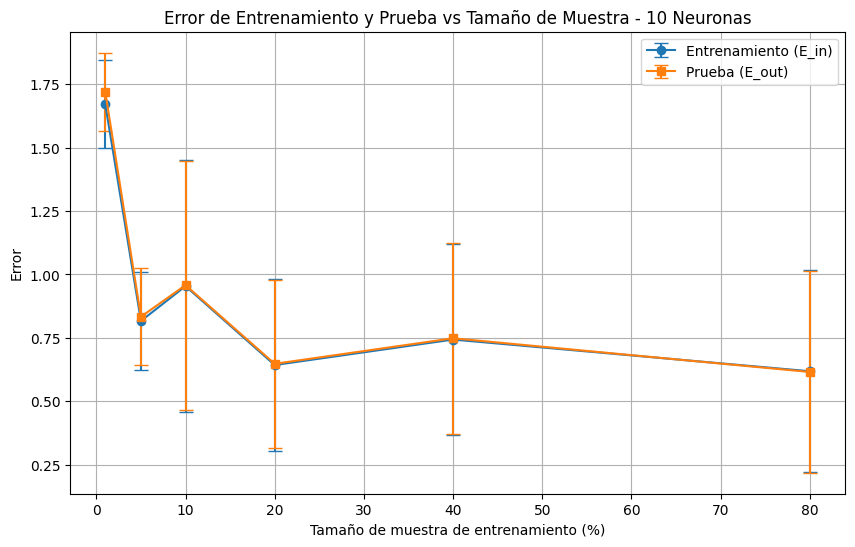

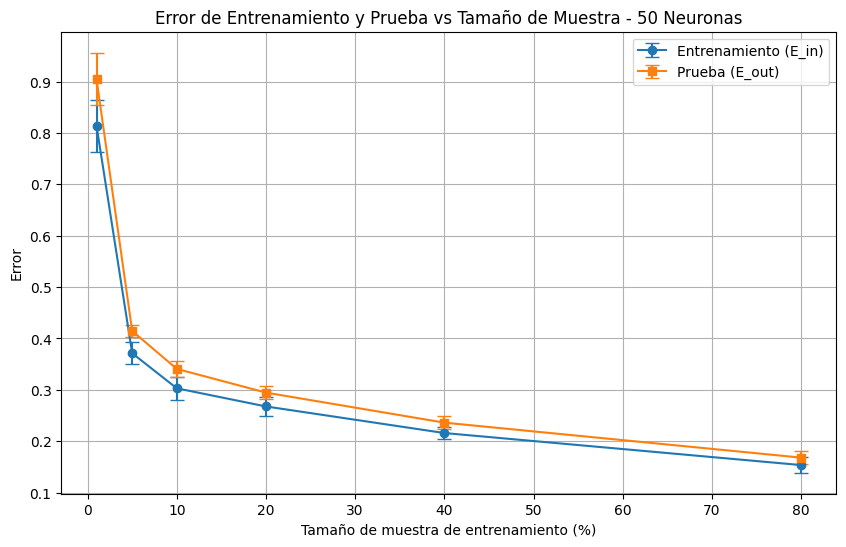

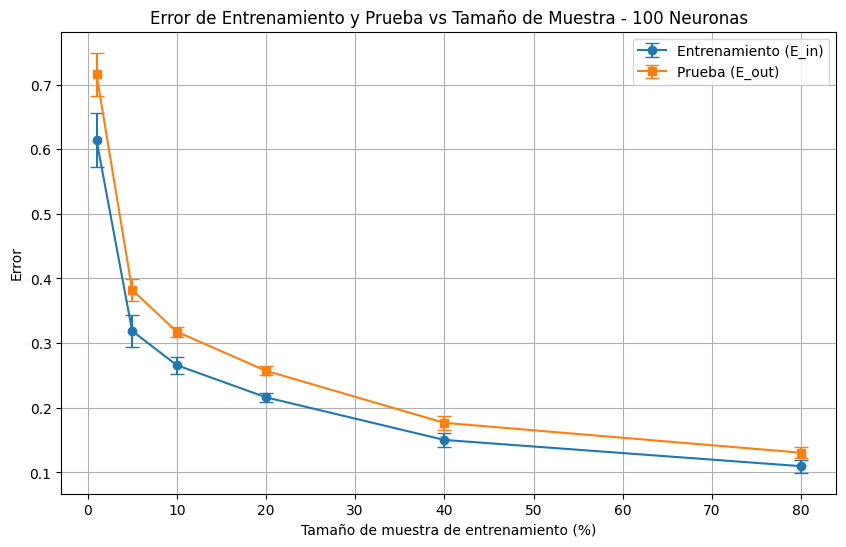

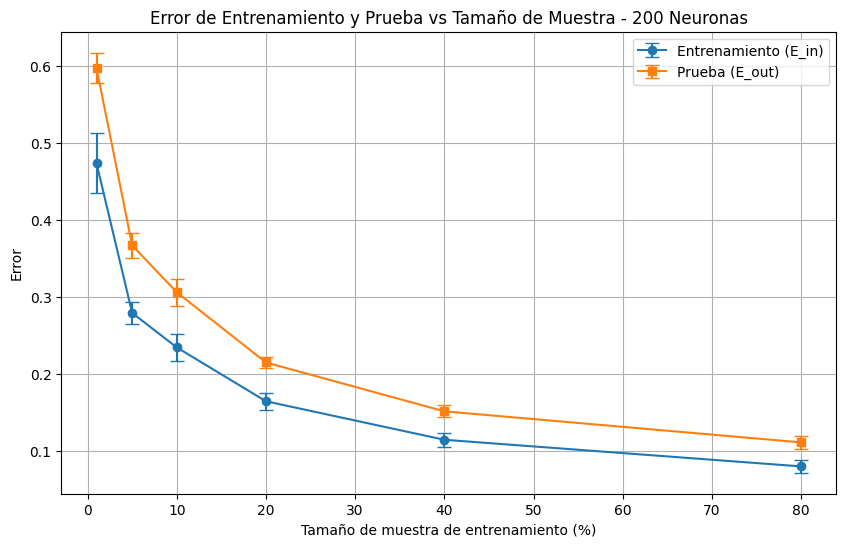

In [ ]:
# Almacenar todos los resultados
all_results = {}

# Entrenamiento y evaluación para cada valor de hidden_neurons
for hidden_neurons in hidden_neurons_list:
    results = {}
    print(f"*** Ejecutando experimento con {hidden_neurons} neuronas en la capa oculta ***")

    for percentage in sampling_percentages:
        train_size = int(len(train_dataset) * percentage)
        e_in_list = []
        e_out_list = []

        for _ in range(10):  # Entrenar 10 veces
            # Muestreo aleatorio del conjunto de entrenamiento
            indices = np.random.choice(len(train_dataset), train_size, replace=False)
            sampled_train_dataset = Subset(train_dataset, indices)
            train_loader = DataLoader(sampled_train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            # Construir y entrenar el modelo
            model = build_model(hidden_neurons)
            optimizer = optim.Adam(model.parameters())

            for epoch in range(num_epochs):
                model.train()
                for images, labels in train_loader:
                    images, labels = images.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(images)
                    loss = nn.CrossEntropyLoss()(outputs, labels)
                    loss.backward()
                    optimizer.step()

            # Calcular E_in y E_out
            model.eval()
            E_in = calculate_error(model, train_loader)
            E_out = calculate_error(model, test_loader)

            e_in_list.append(E_in)
            e_out_list.append(E_out)
        print(f"Error en el entrenamiento {E_in}")
        print(f"Error en prueba {E_out}")

        # Calcular estadísticas
        results[percentage] = {
            'E_in_mean': np.mean(e_in_list),
            'E_in_std': np.std(e_in_list),
            'E_out_mean': np.mean(e_out_list),
            'E_out_std': np.std(e_out_list)
        }

    # Almacenar los resultados para este número de neuronas
    all_results[hidden_neurons] = results

    # Mostrar resultados
    for percentage, stats in results.items():
        print(f"Muestreo: {percentage * 100:.1f}%")
        print(f"E_in - Media: {stats['E_in_mean']:.4f}, Desviación estándar: {stats['E_in_std']:.4f}")
        print(f"E_out - Media: {stats['E_out_mean']:.4f}, Desviación estándar: {stats['E_out_std']:.4f}")
        print("-" * 50)

# Visualización de los resultados para cada valor de hidden_neurons
for hidden_neurons in hidden_neurons_list:
    plt.figure(figsize=(10, 6))
    percentages = [p * 100 for p in sampling_percentages]
    E_in_means = [all_results[hidden_neurons][p]['E_in_mean'] for p in sampling_percentages]
    E_in_stds = [all_results[hidden_neurons][p]['E_in_std'] for p in sampling_percentages]
    E_out_means = [all_results[hidden_neurons][p]['E_out_mean'] for p in sampling_percentages]
    E_out_stds = [all_results[hidden_neurons][p]['E_out_std'] for p in sampling_percentages]

    # Graficar errores de entrenamiento con barras de error
    plt.errorbar(percentages, E_in_means, yerr=E_in_stds, label="Entrenamiento (E_in)", fmt='-o', capsize=5)

    # Graficar errores de prueba con barras de error
    plt.errorbar(percentages, E_out_means, yerr=E_out_stds, label="Prueba (E_out)", fmt='-s', capsize=5)

    # Etiquetas y título
    plt.xlabel("Tamaño de muestra de entrenamiento (%)")
    plt.ylabel("Error")
    plt.title(f"Error de Entrenamiento y Prueba vs Tamaño de Muestra - {hidden_neurons} Neuronas")
    plt.legend()
    plt.grid(True)

    # Mostrar gráfica
    plt.show()